In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from DataGenerator2D import DataGenerator2D
from Models import Resunetpp
from Evaluation_matrices import iou, f1, dice_coef, dice_coef_loss

# COMPILING MODEL

In [3]:

Resunetpp = Resunetpp()
model = Resunetpp.build_model()
checkpoint = ModelCheckpoint('//PATH TO SAVE YOUR MODEL//', verbose=1, monitor ='val_loss',  save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

callbacks = [ checkpoint, reduce_lr]

opt = tf.keras.optimizers.experimental.Adam(1e-3)
metrics = [f1, iou , dice_coef ]

model.compile(loss=dice_coef_loss,
              optimizer=opt,
              metrics=metrics)

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_41 (Conv2D)             (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_37 (BatchN  (None, 256, 256, 16  64         ['conv2d_41[0][0]']              
 ormalization)                  )                                                           

 activation_26 (Activation)     (None, 128, 128, 32  0           ['batch_normalization_42[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_47 (Conv2D)             (None, 64, 64, 64)   18496       ['activation_26[0][0]']          
                                                                                                  
 batch_normalization_43 (BatchN  (None, 64, 64, 64)  256         ['conv2d_47[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_27 (Activation)     (None, 64, 64, 64)   0           ['batch_normalization_43[0][0]'] 
                                                                                                  
 conv2d_49

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_51 (BatchN  (None, 32, 32, 256)  1024       ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_16 (Add)                   (None, 32, 32, 256)  0           ['batch_normalization_48[0][0]', 
                                                                  'batch_normalization_49[0][0]', 
                                                                  'batch_normalization_50[0][0]', 
                                                                  'batch_normalization_51[0][0]'] 
                                                                                                  
 batch_nor

                                                                                                  
 activation_35 (Activation)     (None, 128, 128, 32  0           ['batch_normalization_58[0][0]'] 
                                )                                                                 
                                                                                                  
 batch_normalization_59 (BatchN  (None, 64, 64, 128)  512        ['multiply_15[0][0]']            
 ormalization)                                                                                    
                                                                                                  
 conv2d_64 (Conv2D)             (None, 128, 128, 12  36992       ['activation_35[0][0]']          
                                8)                                                                
                                                                                                  
 activatio

                                                                                                  
 conv2d_70 (Conv2D)             (None, 256, 256, 64  9280        ['activation_40[0][0]']          
                                )                                                                 
                                                                                                  
 activation_41 (Activation)     (None, 128, 128, 64  0           ['batch_normalization_65[0][0]'] 
                                )                                                                 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 64  0          ['conv2d_70[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_71

 conv2d_79 (Conv2D)             (None, 256, 256, 16  4624        ['multiply_19[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization_70 (BatchN  (None, 256, 256, 16  64         ['conv2d_76[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_71 (BatchN  (None, 256, 256, 16  64         ['conv2d_77[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 256, 256, 16  64         ['conv2d_78[0][0]']              
 ormalizat

In [3]:

train_generator = DataGenerator2D('//PATH TO YOUR TRAINING DATA//', img_size=256, batch_size=10, shuffle=True)
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256, batch_size=10, shuffle=False)

# Part 3 - Training

history = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=20,
                              validation_steps=10,
                              epochs=100,
                              callbacks=callbacks)

print(history.history.keys())

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.7648 - f1: 0.2451 - iou: 0.1364 - dice_coef: 0.2352
Epoch 1: val_loss improved from inf to 0.90351, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 55s 1s/step - loss: 0.7648 - f1: 0.2451 - iou: 0.1364 - dice_coef: 0.2352 - val_loss: 0.9035 - val_f1: 0.0000e+00 - val_iou: 0.0507 - val_dice_coef: 0.0965 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5726 - f1: 0.4521 - iou: 0.2759 - dice_coef: 0.4274
Epoch 2: val_loss did not improve from 0.90351
20/20 [==============================] - 12s 594ms/step - loss: 0.5726 - f1: 0.4521 - iou: 0.2759 - dice_coef: 0.4274 - val_loss: 0.9538 - val_f1: 0.0000e+00 - val_iou: 0.0237 - val_dice_coef: 0.0462 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4355 - f1: 0.5875 - iou: 0.4000 - dice_coef: 0.5645
Epoch 3: val_loss did not improve from 0.90351
20/20 [==============================] - 14s 684ms/step - loss: 0.4355 - f1: 0.5875 - iou: 0.4000 - dice_coef: 0.5645 - val_loss: 0.9880 - val_f1: 0.0000e+00 - val_iou: 0.0062 - val_dice_coef: 0.0120 - lr: 0.0010
Epoch 4/100
20/20 [=====

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.1404 - f1: 0.8625 - iou: 0.7786 - dice_coef: 0.8596 - val_loss: 0.8893 - val_f1: 0.1075 - val_iou: 0.0622 - val_dice_coef: 0.1107 - lr: 1.2500e-04
Epoch 12/100
20/20 [==============================] - ETA: 0s - loss: 0.1112 - f1: 0.8884 - iou: 0.8230 - dice_coef: 0.8888
Epoch 12: val_loss improved from 0.88929 to 0.84993, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.1112 - f1: 0.8884 - iou: 0.8230 - dice_coef: 0.8888 - val_loss: 0.8499 - val_f1: 0.1487 - val_iou: 0.0873 - val_dice_coef: 0.1501 - lr: 1.2500e-04
Epoch 13/100
20/20 [==============================] - ETA: 0s - loss: 0.1286 - f1: 0.8715 - iou: 0.8013 - dice_coef: 0.8714
Epoch 13: val_loss improved from 0.84993 to 0.81781, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.1286 - f1: 0.8715 - iou: 0.8013 - dice_coef: 0.8714 - val_loss: 0.8178 - val_f1: 0.1801 - val_iou: 0.1078 - val_dice_coef: 0.1822 - lr: 1.2500e-04
Epoch 14/100
20/20 [==============================] - ETA: 0s - loss: 0.1146 - f1: 0.8881 - iou: 0.8209 - dice_coef: 0.8854
Epoch 14: val_loss improved from 0.81781 to 0.72942, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.1146 - f1: 0.8881 - iou: 0.8209 - dice_coef: 0.8854 - val_loss: 0.7294 - val_f1: 0.2698 - val_iou: 0.1707 - val_dice_coef: 0.2706 - lr: 1.2500e-04
Epoch 15/100
20/20 [==============================] - ETA: 0s - loss: 0.0821 - f1: 0.9197 - iou: 0.8776 - dice_coef: 0.9179
Epoch 15: val_loss improved from 0.72942 to 0.63276, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0821 - f1: 0.9197 - iou: 0.8776 - dice_coef: 0.9179 - val_loss: 0.6328 - val_f1: 0.3678 - val_iou: 0.2460 - val_dice_coef: 0.3672 - lr: 1.2500e-04
Epoch 16/100
20/20 [==============================] - ETA: 0s - loss: 0.0913 - f1: 0.9083 - iou: 0.8554 - dice_coef: 0.9087
Epoch 16: val_loss improved from 0.63276 to 0.62159, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0913 - f1: 0.9083 - iou: 0.8554 - dice_coef: 0.9087 - val_loss: 0.6216 - val_f1: 0.3836 - val_iou: 0.2641 - val_dice_coef: 0.3784 - lr: 1.2500e-04
Epoch 17/100
20/20 [==============================] - ETA: 0s - loss: 0.0978 - f1: 0.9034 - iou: 0.8476 - dice_coef: 0.9022
Epoch 17: val_loss improved from 0.62159 to 0.57538, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0978 - f1: 0.9034 - iou: 0.8476 - dice_coef: 0.9022 - val_loss: 0.5754 - val_f1: 0.4283 - val_iou: 0.2996 - val_dice_coef: 0.4246 - lr: 1.2500e-04
Epoch 18/100
20/20 [==============================] - ETA: 0s - loss: 0.0793 - f1: 0.9187 - iou: 0.8827 - dice_coef: 0.9207
Epoch 18: val_loss improved from 0.57538 to 0.54800, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.0793 - f1: 0.9187 - iou: 0.8827 - dice_coef: 0.9207 - val_loss: 0.5480 - val_f1: 0.4556 - val_iou: 0.3261 - val_dice_coef: 0.4520 - lr: 1.2500e-04
Epoch 19/100
20/20 [==============================] - ETA: 0s - loss: 0.1041 - f1: 0.8973 - iou: 0.8403 - dice_coef: 0.8959
Epoch 19: val_loss did not improve from 0.54800
20/20 [==============================] - 13s 660ms/step - loss: 0.1041 - f1: 0.8973 - iou: 0.8403 - dice_coef: 0.8959 - val_loss: 0.5563 - val_f1: 0.4465 - val_iou: 0.3175 - val_dice_coef: 0.4437 - lr: 1.2500e-04
Epoch 20/100
20/20 [==============================] - ETA: 0s - loss: 0.0936 - f1: 0.9067 - iou: 0.8591 - dice_coef: 0.9064
Epoch 20: val_loss improved from 0.54800 to 0.47226, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0936 - f1: 0.9067 - iou: 0.8591 - dice_coef: 0.9064 - val_loss: 0.4723 - val_f1: 0.5304 - val_iou: 0.3904 - val_dice_coef: 0.5277 - lr: 1.2500e-04
Epoch 21/100
20/20 [==============================] - ETA: 0s - loss: 0.0848 - f1: 0.9153 - iou: 0.8715 - dice_coef: 0.9152
Epoch 21: val_loss improved from 0.47226 to 0.43552, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0848 - f1: 0.9153 - iou: 0.8715 - dice_coef: 0.9152 - val_loss: 0.4355 - val_f1: 0.5680 - val_iou: 0.4247 - val_dice_coef: 0.5645 - lr: 1.2500e-04
Epoch 22/100
20/20 [==============================] - ETA: 0s - loss: 0.0804 - f1: 0.9225 - iou: 0.8811 - dice_coef: 0.9196
Epoch 22: val_loss improved from 0.43552 to 0.42570, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.0804 - f1: 0.9225 - iou: 0.8811 - dice_coef: 0.9196 - val_loss: 0.4257 - val_f1: 0.5785 - val_iou: 0.4426 - val_dice_coef: 0.5743 - lr: 1.2500e-04
Epoch 23/100
20/20 [==============================] - ETA: 0s - loss: 0.0810 - f1: 0.9189 - iou: 0.8788 - dice_coef: 0.9191
Epoch 23: val_loss improved from 0.42570 to 0.38870, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0810 - f1: 0.9189 - iou: 0.8788 - dice_coef: 0.9191 - val_loss: 0.3887 - val_f1: 0.6152 - val_iou: 0.4793 - val_dice_coef: 0.6113 - lr: 1.2500e-04
Epoch 24/100
20/20 [==============================] - ETA: 0s - loss: 0.0784 - f1: 0.9248 - iou: 0.8888 - dice_coef: 0.9216
Epoch 24: val_loss improved from 0.38870 to 0.31846, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.0784 - f1: 0.9248 - iou: 0.8888 - dice_coef: 0.9216 - val_loss: 0.3185 - val_f1: 0.6834 - val_iou: 0.5455 - val_dice_coef: 0.6815 - lr: 1.2500e-04
Epoch 25/100
20/20 [==============================] - ETA: 0s - loss: 0.0708 - f1: 0.9275 - iou: 0.8986 - dice_coef: 0.9293
Epoch 25: val_loss improved from 0.31846 to 0.29255, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.0708 - f1: 0.9275 - iou: 0.8986 - dice_coef: 0.9293 - val_loss: 0.2926 - val_f1: 0.7093 - val_iou: 0.5761 - val_dice_coef: 0.7074 - lr: 1.2500e-04
Epoch 26/100
20/20 [==============================] - ETA: 0s - loss: 0.0702 - f1: 0.9301 - iou: 0.8976 - dice_coef: 0.9298
Epoch 26: val_loss improved from 0.29255 to 0.27373, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.0702 - f1: 0.9301 - iou: 0.8976 - dice_coef: 0.9298 - val_loss: 0.2737 - val_f1: 0.7293 - val_iou: 0.6010 - val_dice_coef: 0.7263 - lr: 1.2500e-04
Epoch 27/100
20/20 [==============================] - ETA: 0s - loss: 0.0542 - f1: 0.9483 - iou: 0.9261 - dice_coef: 0.9458
Epoch 27: val_loss improved from 0.27373 to 0.27284, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 25s 1s/step - loss: 0.0542 - f1: 0.9483 - iou: 0.9261 - dice_coef: 0.9458 - val_loss: 0.2728 - val_f1: 0.7310 - val_iou: 0.6032 - val_dice_coef: 0.7272 - lr: 1.2500e-04
Epoch 28/100
20/20 [==============================] - ETA: 0s - loss: 0.0590 - f1: 0.9410 - iou: 0.9175 - dice_coef: 0.9410
Epoch 28: val_loss improved from 0.27284 to 0.21686, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 26s 1s/step - loss: 0.0590 - f1: 0.9410 - iou: 0.9175 - dice_coef: 0.9410 - val_loss: 0.2169 - val_f1: 0.7849 - val_iou: 0.6649 - val_dice_coef: 0.7831 - lr: 1.2500e-04
Epoch 29/100
20/20 [==============================] - ETA: 0s - loss: 0.0583 - f1: 0.9414 - iou: 0.9175 - dice_coef: 0.9418
Epoch 29: val_loss improved from 0.21686 to 0.21238, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0583 - f1: 0.9414 - iou: 0.9175 - dice_coef: 0.9418 - val_loss: 0.2124 - val_f1: 0.7886 - val_iou: 0.6702 - val_dice_coef: 0.7876 - lr: 1.2500e-04
Epoch 30/100
20/20 [==============================] - ETA: 0s - loss: 0.0369 - f1: 0.9620 - iou: 0.9528 - dice_coef: 0.9631
Epoch 30: val_loss improved from 0.21238 to 0.20596, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0369 - f1: 0.9620 - iou: 0.9528 - dice_coef: 0.9631 - val_loss: 0.2060 - val_f1: 0.7942 - val_iou: 0.6782 - val_dice_coef: 0.7940 - lr: 1.2500e-04
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 0.0595 - f1: 0.9399 - iou: 0.9168 - dice_coef: 0.9405
Epoch 31: val_loss did not improve from 0.20596
20/20 [==============================] - 11s 556ms/step - loss: 0.0595 - f1: 0.9399 - iou: 0.9168 - dice_coef: 0.9405 - val_loss: 0.2443 - val_f1: 0.7587 - val_iou: 0.6361 - val_dice_coef: 0.7557 - lr: 1.2500e-04
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 0.0379 - f1: 0.9608 - iou: 0.9552 - dice_coef: 0.9621
Epoch 32: val_loss did not improve from 0.20596
20/20 [==============================] - 12s 575ms/step - loss: 0.0379 - f1: 0.9608 - iou: 0.9552 - dice_coef: 0.9621 - val_loss: 0.2288 - val_f1: 0.7735 - val_iou: 0.6538 - val_dice_coef: 0.7712 - lr: 1.2500e-04
Epoch 33/100
20/20 [

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0568 - f1: 0.9406 - iou: 0.9228 - dice_coef: 0.9432 - val_loss: 0.2016 - val_f1: 0.7992 - val_iou: 0.6847 - val_dice_coef: 0.7984 - lr: 1.2500e-04
Epoch 34/100
20/20 [==============================] - ETA: 0s - loss: 0.0542 - f1: 0.9444 - iou: 0.9329 - dice_coef: 0.9458
Epoch 34: val_loss improved from 0.20165 to 0.17223, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0542 - f1: 0.9444 - iou: 0.9329 - dice_coef: 0.9458 - val_loss: 0.1722 - val_f1: 0.8273 - val_iou: 0.7236 - val_dice_coef: 0.8278 - lr: 1.2500e-04
Epoch 35/100
20/20 [==============================] - ETA: 0s - loss: 0.0398 - f1: 0.9613 - iou: 0.9499 - dice_coef: 0.9602
Epoch 35: val_loss improved from 0.17223 to 0.16633, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0398 - f1: 0.9613 - iou: 0.9499 - dice_coef: 0.9602 - val_loss: 0.1663 - val_f1: 0.8344 - val_iou: 0.7329 - val_dice_coef: 0.8337 - lr: 1.2500e-04
Epoch 36/100
20/20 [==============================] - ETA: 0s - loss: 0.0441 - f1: 0.9551 - iou: 0.9434 - dice_coef: 0.9559
Epoch 36: val_loss improved from 0.16633 to 0.16077, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0441 - f1: 0.9551 - iou: 0.9434 - dice_coef: 0.9559 - val_loss: 0.1608 - val_f1: 0.8390 - val_iou: 0.7396 - val_dice_coef: 0.8392 - lr: 1.2500e-04
Epoch 37/100
20/20 [==============================] - ETA: 0s - loss: 0.0590 - f1: 0.9389 - iou: 0.9210 - dice_coef: 0.9410
Epoch 37: val_loss did not improve from 0.16077
20/20 [==============================] - 12s 580ms/step - loss: 0.0590 - f1: 0.9389 - iou: 0.9210 - dice_coef: 0.9410 - val_loss: 0.1737 - val_f1: 0.8263 - val_iou: 0.7216 - val_dice_coef: 0.8263 - lr: 1.2500e-04
Epoch 38/100
20/20 [==============================] - ETA: 0s - loss: 0.0466 - f1: 0.9540 - iou: 0.9367 - dice_coef: 0.9534
Epoch 38: val_loss improved from 0.16077 to 0.15592, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 23s 1s/step - loss: 0.0466 - f1: 0.9540 - iou: 0.9367 - dice_coef: 0.9534 - val_loss: 0.1559 - val_f1: 0.8440 - val_iou: 0.7461 - val_dice_coef: 0.8441 - lr: 1.2500e-04
Epoch 39/100
20/20 [==============================] - ETA: 0s - loss: 0.0323 - f1: 0.9674 - iou: 0.9616 - dice_coef: 0.9677
Epoch 39: val_loss did not improve from 0.15592
20/20 [==============================] - 11s 555ms/step - loss: 0.0323 - f1: 0.9674 - iou: 0.9616 - dice_coef: 0.9677 - val_loss: 0.1613 - val_f1: 0.8381 - val_iou: 0.7376 - val_dice_coef: 0.8387 - lr: 1.2500e-04
Epoch 40/100
20/20 [==============================] - ETA: 0s - loss: 0.0259 - f1: 0.9729 - iou: 0.9748 - dice_coef: 0.9741
Epoch 40: val_loss improved from 0.15592 to 0.15476, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 23s 1s/step - loss: 0.0259 - f1: 0.9729 - iou: 0.9748 - dice_coef: 0.9741 - val_loss: 0.1548 - val_f1: 0.8450 - val_iou: 0.7493 - val_dice_coef: 0.8452 - lr: 1.2500e-04
Epoch 41/100
20/20 [==============================] - ETA: 0s - loss: 0.0227 - f1: 0.9764 - iou: 0.9838 - dice_coef: 0.9773
Epoch 41: val_loss improved from 0.15476 to 0.14045, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0227 - f1: 0.9764 - iou: 0.9838 - dice_coef: 0.9773 - val_loss: 0.1405 - val_f1: 0.8592 - val_iou: 0.7692 - val_dice_coef: 0.8595 - lr: 1.2500e-04
Epoch 42/100
20/20 [==============================] - ETA: 0s - loss: 0.0174 - f1: 0.9824 - iou: 0.9904 - dice_coef: 0.9826
Epoch 42: val_loss did not improve from 0.14045
20/20 [==============================] - 11s 539ms/step - loss: 0.0174 - f1: 0.9824 - iou: 0.9904 - dice_coef: 0.9826 - val_loss: 0.1557 - val_f1: 0.8435 - val_iou: 0.7470 - val_dice_coef: 0.8443 - lr: 1.2500e-04
Epoch 43/100
20/20 [==============================] - ETA: 0s - loss: 0.0365 - f1: 0.9620 - iou: 0.9571 - dice_coef: 0.9635
Epoch 43: val_loss did not improve from 0.14045
20/20 [==============================] - 11s 550ms/step - loss: 0.0365 - f1: 0.9620 - iou: 0.9571 - dice_coef: 0.9635 - val_loss: 0.1498 - val_f1: 0.8493 - val_iou: 0.7547 - val_dice_coef: 0.8502 - lr: 1.2500e-04
Epoch 44/100
20/20 [

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0074 - f1: 0.9938 - iou: 1.0165 - dice_coef: 0.9926 - val_loss: 0.1396 - val_f1: 0.8598 - val_iou: 0.7720 - val_dice_coef: 0.8604 - lr: 6.2500e-05
Epoch 48/100
20/20 [==============================] - ETA: 0s - loss: 0.0145 - f1: 0.9850 - iou: 1.0016 - dice_coef: 0.9855
Epoch 48: val_loss did not improve from 0.13962
20/20 [==============================] - 11s 536ms/step - loss: 0.0145 - f1: 0.9850 - iou: 1.0016 - dice_coef: 0.9855 - val_loss: 0.1437 - val_f1: 0.8559 - val_iou: 0.7656 - val_dice_coef: 0.8563 - lr: 6.2500e-05
Epoch 49/100
20/20 [==============================] - ETA: 0s - loss: 0.0027 - f1: 0.9951 - iou: 1.0228 - dice_coef: 0.9973
Epoch 49: val_loss improved from 0.13962 to 0.13750, saving model to E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0027 - f1: 0.9951 - iou: 1.0228 - dice_coef: 0.9973 - val_loss: 0.1375 - val_f1: 0.8625 - val_iou: 0.7754 - val_dice_coef: 0.8625 - lr: 6.2500e-05
Epoch 50/100
20/20 [==============================] - ETA: 0s - loss: 0.0184 - f1: 0.9805 - iou: 0.9899 - dice_coef: 0.9816
Epoch 50: val_loss did not improve from 0.13750
20/20 [==============================] - 11s 545ms/step - loss: 0.0184 - f1: 0.9805 - iou: 0.9899 - dice_coef: 0.9816 - val_loss: 0.1402 - val_f1: 0.8592 - val_iou: 0.7716 - val_dice_coef: 0.8598 - lr: 6.2500e-05
Epoch 51/100
20/20 [==============================] - ETA: 0s - loss: 0.0094 - f1: 0.9896 - iou: 1.0083 - dice_coef: 0.9906
Epoch 51: val_loss did not improve from 0.13750
20/20 [==============================] - 11s 537ms/step - loss: 0.0094 - f1: 0.9896 - iou: 1.0083 - dice_coef: 0.9906 - val_loss: 0.1394 - val_f1: 0.8602 - val_iou: 0.7726 - val_dice_coef: 0.8606 - lr: 6.2500e-05
Epoch 52/100
20/20 [

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunetpp_lanesegmentation_model\assets


20/20 [==============================] - 24s 1s/step - loss: 0.0026 - f1: 0.9950 - iou: 1.0201 - dice_coef: 0.9974 - val_loss: 0.1334 - val_f1: 0.8661 - val_iou: 0.7814 - val_dice_coef: 0.8666 - lr: 3.1250e-05
Epoch 56/100
20/20 [==============================] - ETA: 0s - loss: -0.0064 - f1: 1.0052 - iou: 1.0406 - dice_coef: 1.0064
Epoch 56: val_loss did not improve from 0.13336
20/20 [==============================] - 11s 540ms/step - loss: -0.0064 - f1: 1.0052 - iou: 1.0406 - dice_coef: 1.0064 - val_loss: 0.1416 - val_f1: 0.8581 - val_iou: 0.7689 - val_dice_coef: 0.8584 - lr: 3.1250e-05
Epoch 57/100
20/20 [==============================] - ETA: 0s - loss: 0.0026 - f1: 0.9984 - iou: 1.0216 - dice_coef: 0.9974
Epoch 57: val_loss did not improve from 0.13336
20/20 [==============================] - 11s 540ms/step - loss: 0.0026 - f1: 0.9984 - iou: 1.0216 - dice_coef: 0.9974 - val_loss: 0.1420 - val_f1: 0.8577 - val_iou: 0.7685 - val_dice_coef: 0.8580 - lr: 3.1250e-05
Epoch 58/100
20/20

Epoch 76/100
20/20 [==============================] - ETA: 0s - loss: -0.0121 - f1: 1.0124 - iou: 1.0553 - dice_coef: 1.0121
Epoch 76: val_loss did not improve from 0.13336
20/20 [==============================] - 11s 549ms/step - loss: -0.0121 - f1: 1.0124 - iou: 1.0553 - dice_coef: 1.0121 - val_loss: 0.1364 - val_f1: 0.8633 - val_iou: 0.7766 - val_dice_coef: 0.8636 - lr: 1.0000e-06
Epoch 77/100
20/20 [==============================] - ETA: 0s - loss: -0.0099 - f1: 1.0100 - iou: 1.0468 - dice_coef: 1.0099
Epoch 77: val_loss did not improve from 0.13336
20/20 [==============================] - 11s 540ms/step - loss: -0.0099 - f1: 1.0100 - iou: 1.0468 - dice_coef: 1.0099 - val_loss: 0.1367 - val_f1: 0.8630 - val_iou: 0.7763 - val_dice_coef: 0.8633 - lr: 1.0000e-06
Epoch 78/100
20/20 [==============================] - ETA: 0s - loss: -0.0106 - f1: 1.0097 - iou: 1.0450 - dice_coef: 1.0106
Epoch 78: val_loss did not improve from 0.13336
20/20 [==============================] - 11s 538ms/st

In [4]:
model.save_weights('//PATH TO SAVE YOUR WEIGHTS//')

# Part 4 - Visualization

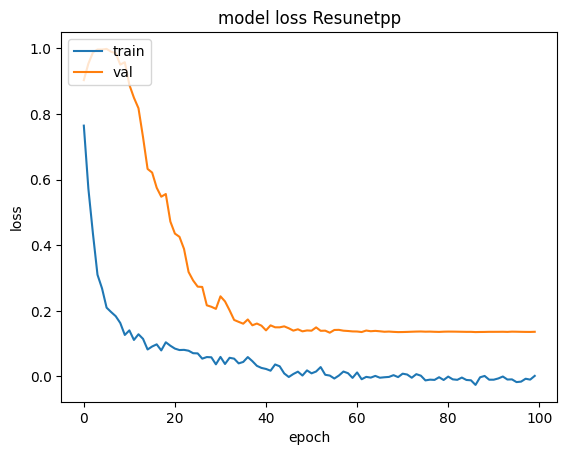

In [5]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss Resunetpp')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


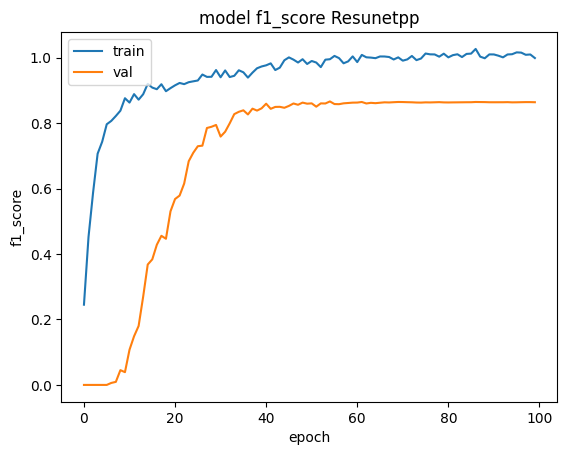

In [6]:
# summarize history for F1

plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1_score Resunetpp')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


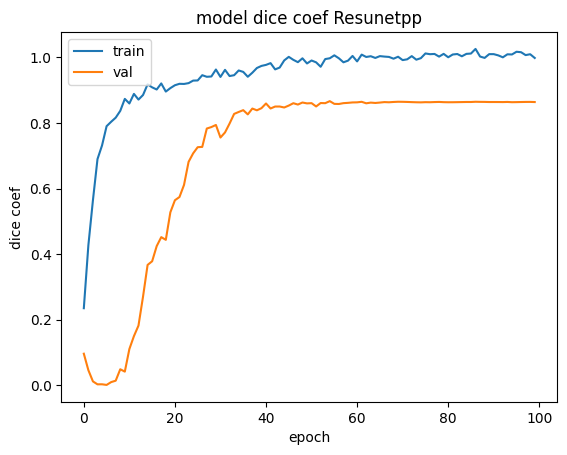

In [7]:
# summarize history for dice_coef

plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef Resunetpp')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate 

In [4]:
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256,batch_size=128, shuffle=True)
model = Resunetpp.build_model()
model.load_weights('//PATH TO YOUR RESUNET++ MODEL WEIGHTS.h5//')
model.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = model.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 20s 4s/step - loss: 0.1001 - f1: 0.8939 - iou: 0.8427 - dice_coef: 0.8982


In [5]:
X, y = val_generator.__getitem__(0)
predict = model.predict(X)

4/4 [==============================] - 3s 273ms/step


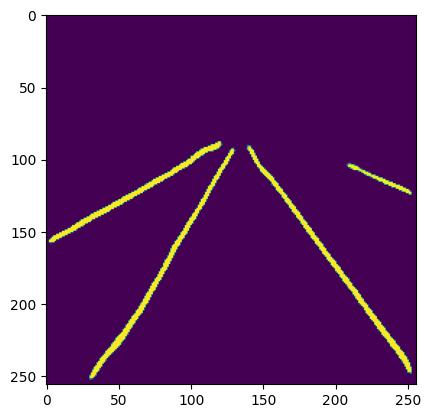

In [6]:
img = predict[2]
plt.imshow(img)

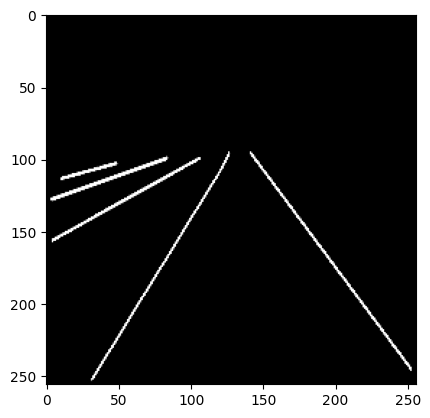

In [7]:
plt.imshow(y[2])

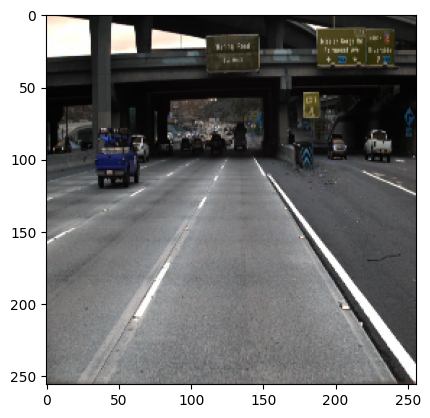

In [8]:
plt.imshow(X[2])